# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

I cleaned the Price variable mainly by removing the dollar sign and rhe commas in the prices over 999 dollars. There are no missing values in this variable.

In [10]:
#1
import pandas as pd
# Load the Airbnb dataset
file_path = 'https://raw.githubusercontent.com/Lisabyy/wrangling/refs/heads/main/assignment/data/airbnb_hw.csv'
df_airbnb = pd.read_csv(file_path)

print(df_airbnb['Price'].head(10))

# Remove dollar signs and commas, then convert to numeric
df_airbnb['Price'] = df_airbnb['Price'].astype(str).str.replace(r'[$,]', '', regex=True)
df_airbnb['Price'] = pd.to_numeric(df_airbnb['Price'], errors='coerce')

# Count missing values
missing_prices = df_airbnb['Price'].isna().sum()
print(f"Number of missing Price values: {missing_prices}")

0    145
1     37
2     28
3    199
4    549
5    149
6    250
7     90
8    270
9    290
Name: Price, dtype: object
Number of missing Price values: 0


In [12]:
#2
file_path = 'https://raw.githubusercontent.com/Lisabyy/wrangling/refs/heads/main/assignment/data/mn_police_use_of_force.csv'
df_police = pd.read_csv(file_path)

print(df_police['subject_injury'].value_counts(dropna=False))

# Standardize values: Convert to lowercase and map to 'Yes' or 'No'
df_police['subject_injury'] = df_police['subject_injury'].str.strip().str.lower()

# Define mapping
injury_mapping = {
    'yes': 'Yes',
    'no': 'No',
    'unknown': 'Unknown'
}

df_police['subject_injury'] = df_police['subject_injury'].map(injury_mapping).fillna('Unknown')

# Check proportion of missing (now 'Unknown') values
missing_injury = (df_police['subject_injury'] == 'Unknown').mean()
print(f"Proportion of missing subject_injury values: {missing_injury:.2%}")

# Cross-tabulation of cleaned injury variable and force type
crosstab_result = pd.crosstab(df_police['subject_injury'], df_police['force_type'])
print(crosstab_result)

subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64
Proportion of missing subject_injury values: 76.19%
force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  0          1093                131        2   
Unknown             2          7051               1421        0   
Yes                 2          1286                 41        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
No                             33                 34            0   
Unknown                        27                 74           87   
Yes                            44                 40            0   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
No                                   1         

A high proportion of missing values suggest incomplete reporting of the data. The patterns regarding the missing data need further analysis.

In [16]:
#3
import pandas as pd
import numpy as np
file_path = '/justice_data.parquet'
df_pretrial = pd.read_parquet(file_path)

print(df_pretrial['WhetherDefendantWasReleasedPretrial'].value_counts(dropna=False))

# Define mapping
release_mapping = {
    'yes': 'Yes',
    'no': 'No',
    'released': 'Yes',
    'not released': 'No'
}

df_pretrial['WhetherDefendantWasReleasedPretrial'] = df_pretrial['WhetherDefendantWasReleasedPretrial'].map(release_mapping)

# Replace missing values
df_pretrial['WhetherDefendantWasReleasedPretrial'] = df_pretrial['WhetherDefendantWasReleasedPretrial'].replace('', np.nan)

WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64


For the recorded sentences, separating them from missing values and proper values (with the meaning of no conviction) helps present the data more clearly.

In [17]:
#4
print(df_pretrial[['ImposedSentenceAllChargeInContactEvent', 'SentenceTypeAllChargesAtConvictionInContactEvent']].head(20))

# If sentence type is 'No conviction', replace missing sentence with 'Unknown'
df_pretrial.loc[
    df_pretrial['SentenceTypeAllChargesAtConvictionInContactEvent'] == 'No conviction',
    'ImposedSentenceAllChargeInContactEvent'
] = 'Unknown'

# Convert numeric values properly
df_pretrial['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(
    df_pretrial['ImposedSentenceAllChargeInContactEvent'], errors='coerce'
)

# Missing values
missing_sentences = df_pretrial['ImposedSentenceAllChargeInContactEvent'].isna().sum()
print(f"Missing values after cleaning: {missing_sentences}")

   ImposedSentenceAllChargeInContactEvent  \
0                                           
1                                      60   
2                                      12   
3                        .985626283367556   
4                                           
5                                      12   
6                                      36   
7                                       6   
8                                      24   
9                                      12   
10                       5.91375770020534   
11                                          
12                                          
13                                    120   
14                                     24   
15                                          
16                                          
17                                     12   
18                                          
19                                     12   

    SentenceTypeAllChargesAtConvictionInContactEvent  

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [43]:
#1
import pandas as pd
file_path = '/Sharks.xls'
df = pd.read_excel(file_path)

#2
columns_to_drop = [col for col in df.columns if df[col].isnull().all()]
df = df.drop(columns=columns_to_drop)

count    5458.000000
mean     1991.937156
std        24.083712
min      1940.000000
25%      1969.000000
50%      2000.000000
75%      2013.000000
max      2026.000000
Name: Year, dtype: float64


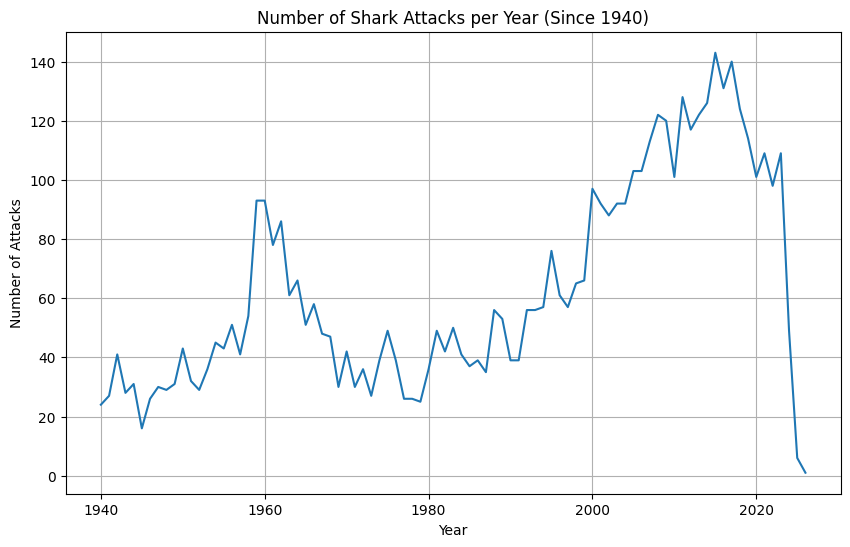

In [44]:
#3
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df.dropna(subset=['Year'], inplace=True)
df = df[df['Year'] >= 1940]  # Keep attacks since 1940

year_range = df['Year'].describe()
print(year_range)

import matplotlib.pyplot as plt
# Count attacks per year
attacks_per_year = df.groupby('Year').size()

# Plot trend
plt.figure(figsize=(10, 6))
attacks_per_year.plot(kind='line')
plt.title('Number of Shark Attacks per Year (Since 1940)')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.show()

The shark attacks fluctuate throughout the time, having both increases and decreases. Overall, the trend is decreasing.

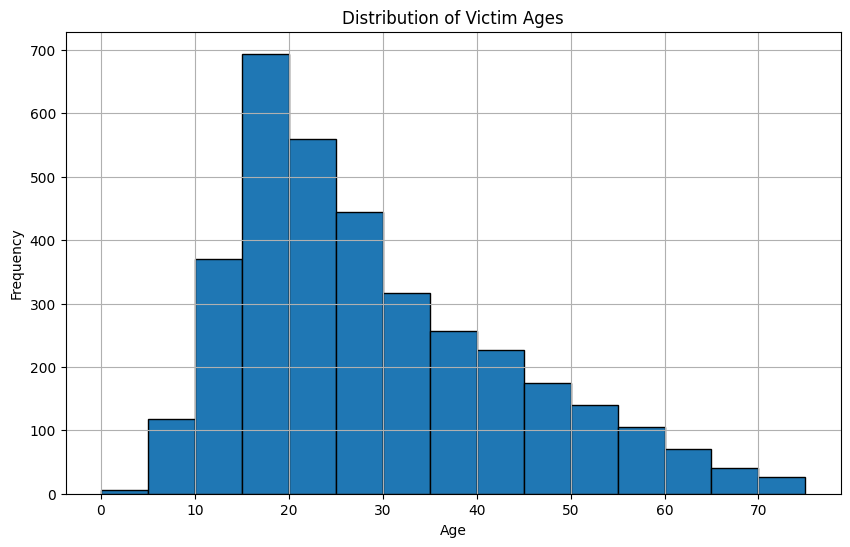

In [45]:
#4
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df.dropna(subset=['Age'], inplace=True)

# Plot histogram
plt.figure(figsize=(10, 6))
df['Age'].plot(kind='hist', bins=range(0, 80, 5), edgecolor='black')
plt.title('Distribution of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [46]:
#5
df['Sex'] = df['Sex'].str.strip().str.upper()

male_victims = df[df['Sex'] == 'M'].shape[0]
total_victims = df.shape[0]
proportion_male = male_victims / total_victims

print(f"Proportion of male victims: {proportion_male:.2%}")

Proportion of male victims: 83.76%


In [47]:
#6
df['Type'] = df['Type'].str.strip().str.capitalize()

type_mapping = {
    'Provoked': 'Provoked',
    'Unprovoked': 'Unprovoked',
    'Boat': 'Unprovoked',
    'Sea disaster': 'Unprovoked',
    'Boating': 'Unprovoked',
    'Invalid': 'Unknown',
    'Questionable': 'Unknown',
    'Unknown': 'Unknown'
}

df['Type'] = df['Type'].map(type_mapping).fillna('Unknown')

# Calculate proportion of unprovoked attacks
unprovoked_attacks = df[df['Type'] == 'Unprovoked'].shape[0]
proportion_unprovoked = unprovoked_attacks / total_victims

print(f"Proportion of unprovoked attacks: {proportion_unprovoked:.2%}")

Proportion of unprovoked attacks: 84.18%


In [48]:
#7
df['Fatal Y/N'] = df['Fatal Y/N'].str.strip().str.upper()

fatal_mapping = {
    'Y': 'Y',
    'N': 'N',
    'UNKNOWN': 'Unknown',
    'F': 'Y'
}

df['Fatal Y/N'] = df['Fatal Y/N'].map(fatal_mapping).fillna('Unknown')

In [52]:
#8
# Contingency table for 'Sex' and 'Type'
sex_type_table = pd.crosstab(df['Sex'], df['Type'])

# Proportion of unprovoked attacks by gender
unprovoked_by_gender = sex_type_table['Unprovoked'] / sex_type_table.sum(axis=1)
print(unprovoked_by_gender)

# Contingency table for 'Type' and 'Fatal Y/N'
fatal_by_type = pd.crosstab(df['Type'], df['Fatal Y/N'], normalize='index') * 100
print(fatal_by_type)

# Contingency table for 'Sex' and 'Fatal Y/N'
fatal_by_gender = pd.crosstab(df['Sex'], df['Fatal Y/N'], normalize='index') * 100
print(fatal_by_gender)

Sex
F      0.878899
LLI    1.000000
M      0.836297
dtype: float64
Fatal Y/N           N    Unknown          Y
Type                                       
Provoked    96.219931   1.030928   2.749141
Unknown     24.632353  70.955882   4.411765
Unprovoked  82.710280   0.534045  16.755674
Fatal Y/N           N   Unknown          Y
Sex                                       
F           80.183486  6.422018  13.394495
LLI        100.000000  0.000000   0.000000
M           79.369339  5.803422  14.827239


Sharks are more likely to launch unprovoked attacks on women, with a 4% difference in the proportion. The attack is more likely to be fatal when it's unprovoked. And it's more likely to be fatal for men. Shark attacks are more random than perceived, which implied about its dangerousness.

In [58]:
#9
df['Species '] = df['Species '].astype(str)
df['Species '] = df['Species '].str.split()

# Check proportion of attacks by white sharks
white_shark_attacks = df[df['Species '].str.contains('white', na=False)].shape[0]
proportion_white_shark = white_shark_attacks / total_victims

print(f"Proportion of attacks by white sharks: {proportion_white_shark:.2%}")

Proportion of attacks by white sharks: 0.00%


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

1. The Census Bureau collects race data according to U.S. Office of Management and Budget guidelines, and these data are based on self-identification. People may choose to report more than one race group. People of any race may be of any ethnic origin.
2. Gathering race-related data helps facilitate the creation and implementation of policies and civil rights laws in politics and society. With high-quality and accurate data as references, more effective standards and reforms can be conducted to address complex societal challenges.
3. The Census did well in providing multiple selections of races, allowing for increasing diversity, especially of those who have mixed backgrounds. It could potentially improve in having clear definitions about races and ethinity groups, making the survey process easier for people. Perhaps adding the North African category would complement the current survey as well. Additionally, the Census' good practices should be used in other forms of surveys to gather richer and more useful data.
4. The Census has gathered data on sex and gender based on binary options, male and female. However, the Household Pulse Survey included questions on sexual orientation and gender identity, demonstrating more diversity and inclusion of differences in sex and gender. It should continue working on adopting new means of data collection to be inclusive of people's perceptions.
5. The process of data cleaning raises potential concerns about acccurate clarification and representation of those protected characteristics. When there are missing values, the accuracy will be affected with potential statistical insignificance and biases. People might adopt imputation methods to mitigate the biases.
6. Utilitizing algorithm to impute values for protected characteristics could raise trust issues towards the reliability of the gathered data and surveys. People might be more reserved when filling out their personal information and identitis while taking the surveys.